<a href="https://colab.research.google.com/github/ChangCorp/finalproject/blob/main/Stage_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder   
import pickle  
from pathlib import Path  

%matplotlib inline 
matplotlib.style.use('ggplot') 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/train_delimited_comma.csv')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1. Descriptive Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
# Checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# Checking duplicate record
df.duplicated().sum() 

0

In [10]:
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [12]:
df.groupby('pdays').agg({'pdays':['count']}).head()

,pdays
,count
pdays,
-1,36954
1,15
2,37
3,1
4,2


In [13]:
df.groupby('previous').agg({'pdays':['count']}).head()

,pdays
,count
previous,
0,36954
1,2772
2,2106
3,1142
4,714


In [14]:
df[df['previous']==0].groupby('campaign').agg({'campaign':['count']}).head() 

,campaign
,count
campaign,
1,13529
2,10229
3,4608
4,3097
5,1508


## Insight Descriptive Statistics

**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**<br>
Dari semua informasi di atas, terlihat bahwa data tersebut memiliki 17 feature/ kolom. Tipe data untuk masing-masing kolom sudah sesuai. Antara nama kolom dengan isinya juga sudah sesuai.
<br>
<br>
**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**<br>
Dari 17 kolom tidak ada satupun yang memiliki nilai kosong, sehingga tidak perlu ada preprocessing untuk missing values.
<br>
<br>
**C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)**<br>
<br>
**Kolom Numerik**<br>


`Age`: Untuk kolom age tidak terlihat potensi skewed karena mean (40.9) dan mediannya (39.0) tidak berbeda signifikan.
<br>

`Balance`: Untuk kolom balance terlihat nilai mean (1362.3) sangat jauh di atas mediannya (448.0). Nilai minimum balance memiliki nilai aneh, yaitu nilai yang minus sebesar -8019.<br>

`Day`: Untuk kolom day terlihat mean (15.8) dan median (16.0) hampir sama. Kemudian nilai minimum, maksimum, kuartil 1 dan 3 terlihat normal. <br>

`Duration`: Untuk kolom duration terlihat bahwa nilai mean (258.2) lebih besar dari nilai median (180.0). <br>

`Campaign`: Untuk kolom campaign nampak adanya kecenderungan positive skew, di mana nilai mean (2.7) lebih besar dibanding nilai median (2.0) <br>

`Pdays`: Untuk kolom pdays terlihat data berkumpul di angka -1 (36954 dari 45211 records), yang artinya hampir semua client tidak pernah di hubungi sebelumnya. <br> 

`Previous`: Untuk kolom previous terlihat kebanyakan client (36954 dari 45211 records) belum pernah menerima campaign sebelumnya.<br>
<br>
<br>
`Kolom Kategori`<br>
`job` : terdapat 12 pekerjaan berbeda, mayoritas 'blue-collar' (21.5%, 9732/45211).<br>
`marital` : lebih dari 50% klien sudah menikah.<br>
`education` : lebih dari 50% secondary<br>
`housing` : lebih dari 50% client memiliki pinjaman rumah.<br> 
`loan` : mayoritas client tidak memiliki personal loan.<br>
`contact` : lebih dari 50% client menggunakan telepon seluler. <br>
`month` : paling banyak di bulan May saat melakukan campaign.<br>
`poutcome` : ~80% memiliki value 'unknown'<br>
`y` : 88.3% client tidak membeli deposito.

# 2. Univariate Analysis

#### Numerical Data


##### Age

In [15]:
## Age ##

Q1_age = np.quantile(df['age'], .25)
Q3_age = np.quantile(df['age'], .75)
IQR_age = Q3_age - Q1_age
min_IQR_age = Q1_age - 1.5 * IQR_age
max_IQR_age = Q3_age + 1.5 * IQR_age
nilai_min_age = np.min(df['age'])
nilai_max_age = np.max(df['age'])

print('')
print('A. Mencari outlier dari kolom age')
print('1. nilai Q1 dari age =', Q1_age)
print('2. nilai Q3 dari age =', Q3_age)
print('3. nilai IQR dari age =', IQR_age)
print('4. nilai min IQR dari age =', min_IQR_age)
print('5. nilai max IQR dari age =', max_IQR_age)
print('6. nilai min dari age =', nilai_min_age)
print('7. nilai max dari age =', nilai_max_age)

if (nilai_min_age < min_IQR_age):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_age > max_IQR_age):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom age
1. nilai Q1 dari age = 33.0
2. nilai Q3 dari age = 48.0
3. nilai IQR dari age = 15.0
4. nilai min IQR dari age = 10.5
5. nilai max IQR dari age = 70.5
6. nilai min dari age = 18
7. nilai max dari age = 95
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Day

In [16]:
## Day ##

Q1_day = np.quantile(df['day'], .25)
Q3_day = np.quantile(df['day'], .75)
IQR_day = Q3_day - Q1_day
min_IQR_day = Q1_day - 1.5 * IQR_day
max_IQR_day = Q3_day + 1.5 * IQR_day
nilai_min_day = np.min(df['day'])
nilai_max_day = np.max(df['day'])

print('')
print('A. Mencari outlier dari kolom day')
print('1. nilai Q1 dari day =', Q1_day)
print('2. nilai Q3 dari day =', Q3_day)
print('3. nilai IQR dari day =', IQR_day)
print('4. nilai min IQR dari day =', min_IQR_day)
print('5. nilai max IQR dari day =', max_IQR_day)
print('6. nilai min dari day =', nilai_min_day)
print('7. nilai max dari day =', nilai_max_day)

if (nilai_min_day < min_IQR_day):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_day > max_IQR_day):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom day
1. nilai Q1 dari day = 8.0
2. nilai Q3 dari day = 21.0
3. nilai IQR dari day = 13.0
4. nilai min IQR dari day = -11.5
5. nilai max IQR dari day = 40.5
6. nilai min dari day = 1
7. nilai max dari day = 31
Tidak ditemukan low outlier!
Tidak ditemukan high outlier!


##### Balance

In [17]:
## Balance ##
Q1_balance = np.quantile(df['balance'], .25)
Q3_balance = np.quantile(df['balance'], .75)
IQR_balance = Q3_balance - Q1_balance
min_IQR_balance = Q1_balance - 1.5 * IQR_balance
max_IQR_balance = Q3_balance + 1.5 * IQR_balance
nilai_min_balance = np.min(df['balance'])
nilai_max_balance = np.max(df['balance'])

print('')
print('A. Mencari outlier dari kolom balance')
print('1. nilai Q1 dari balance =', Q1_balance)
print('2. nilai Q3 dari balance =', Q3_balance)
print('3. nilai IQR dari balance =', IQR_balance)
print('4. nilai min IQR dari balance =', min_IQR_balance)
print('5. nilai max IQR dari balance =', max_IQR_balance)
print('6. nilai min dari balance =', nilai_min_balance)
print('7. nilai max dari balance =', nilai_max_balance)

if (nilai_min_balance < min_IQR_balance):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_balance > max_IQR_balance):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom balance
1. nilai Q1 dari balance = 72.0
2. nilai Q3 dari balance = 1428.0
3. nilai IQR dari balance = 1356.0
4. nilai min IQR dari balance = -1962.0
5. nilai max IQR dari balance = 3462.0
6. nilai min dari balance = -8019
7. nilai max dari balance = 102127
Ditemukan low outlier!
Ditemukan high outlier!


##### Duration

In [18]:
## Duration ##

Q1_duration = np.quantile(df['duration'], .25)
Q3_duration = np.quantile(df['duration'], .75)
IQR_duration = Q3_duration - Q1_duration
min_IQR_duration = Q1_duration - 1.5 * IQR_duration
max_IQR_duration = Q3_duration + 1.5 * IQR_duration
nilai_min_duration = np.min(df['duration'])
nilai_max_duration = np.max(df['duration'])

print('')
print('A. Mencari outlier dari kolom duration')
print('1. nilai Q1 dari duration =', Q1_duration)
print('2. nilai Q3 dari duration =', Q3_duration)
print('3. nilai IQR dari duration =', IQR_duration)
print('4. nilai min IQR dari duration =', min_IQR_duration)
print('5. nilai max IQR dari duration =', max_IQR_duration)
print('6. nilai min dari duration =', nilai_min_duration)
print('7. nilai max dari duration =', nilai_max_duration)

if (nilai_min_duration < min_IQR_duration):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_duration > max_IQR_duration):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom duration
1. nilai Q1 dari duration = 103.0
2. nilai Q3 dari duration = 319.0
3. nilai IQR dari duration = 216.0
4. nilai min IQR dari duration = -221.0
5. nilai max IQR dari duration = 643.0
6. nilai min dari duration = 0
7. nilai max dari duration = 4918
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Campaign

In [19]:
# Campaign #

Q1_campaign = np.quantile(df['campaign'], .25)
Q3_campaign = np.quantile(df['campaign'], .75)
IQR_campaign = Q3_campaign - Q1_campaign
min_IQR_campaign = Q1_campaign - 1.5 * IQR_campaign
max_IQR_campaign = Q3_campaign + 1.5 * IQR_campaign
nilai_min_campaign = np.min(df['campaign'])
nilai_max_campaign = np.max(df['campaign'])

print('')
print('A. Mencari outlier dari kolom campaign')
print('1. nilai Q1 dari campaign =', Q1_campaign)
print('2. nilai Q3 dari campaign =', Q3_campaign)
print('3. nilai IQR dari campaign =', IQR_campaign)
print('4. nilai min IQR dari campaign =', min_IQR_campaign)
print('5. nilai max IQR dari campaign =', max_IQR_campaign)
print('6. nilai min dari campaign =', nilai_min_campaign)
print('7. nilai max dari campaign =', nilai_max_campaign)

if (nilai_min_campaign < min_IQR_campaign):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_campaign > max_IQR_campaign):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom campaign
1. nilai Q1 dari campaign = 1.0
2. nilai Q3 dari campaign = 3.0
3. nilai IQR dari campaign = 2.0
4. nilai min IQR dari campaign = -2.0
5. nilai max IQR dari campaign = 6.0
6. nilai min dari campaign = 1
7. nilai max dari campaign = 63
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Pdays

In [20]:
# Pdays #

Q1_pdays = np.quantile(df['pdays'], .25)
Q3_pdays = np.quantile(df['pdays'], .75)
IQR_pdays = Q3_pdays - Q1_pdays
min_IQR_pdays = Q1_pdays - 1.5 * IQR_pdays
max_IQR_pdays = Q3_pdays + 1.5 * IQR_pdays
nilai_min_pdays = np.min(df['pdays'])
nilai_max_pdays = np.max(df['pdays'])

print('')
print('A. Mencari outlier dari kolom pdays')
print('1. nilai Q1 dari pdays =', Q1_pdays)
print('2. nilai Q3 dari pdays =', Q3_pdays)
print('3. nilai IQR dari pdays =', IQR_pdays)
print('4. nilai min IQR dari pdays =', min_IQR_pdays)
print('5. nilai max IQR dari pdays =', max_IQR_pdays)
print('6. nilai min dari pdays =', nilai_min_pdays)
print('7. nilai max dari pdays =', nilai_max_pdays)

if (nilai_min_pdays < min_IQR_pdays):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_pdays > max_IQR_pdays):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom pdays
1. nilai Q1 dari pdays = -1.0
2. nilai Q3 dari pdays = -1.0
3. nilai IQR dari pdays = 0.0
4. nilai min IQR dari pdays = -1.0
5. nilai max IQR dari pdays = -1.0
6. nilai min dari pdays = -1
7. nilai max dari pdays = 871
Tidak ditemukan low outlier!
Ditemukan high outlier!


##### Previous

In [21]:
# Previous

Q1_previous = np.quantile(df['previous'], .25)
Q3_previous = np.quantile(df['previous'], .75)
IQR_previous = Q3_previous - Q1_previous
min_IQR_previous = Q1_previous - 1.5 * IQR_previous
max_IQR_previous = Q3_previous + 1.5 * IQR_previous
nilai_min_previous = np.min(df['previous'])
nilai_max_previous = np.max(df['previous'])

print('')
print('A. Mencari outlier dari kolom previous')
print('1. nilai Q1 dari previous =', Q1_previous)
print('2. nilai Q3 dari previous =', Q3_previous)
print('3. nilai IQR dari previous =', IQR_previous)
print('4. nilai min IQR dari previous =', min_IQR_previous)
print('5. nilai max IQR dari previous =', max_IQR_previous)
print('6. nilai min dari previous =', nilai_min_previous)
print('7. nilai max dari previous =', nilai_max_previous)

if (nilai_min_previous < min_IQR_previous):
    print('Ditemukan low outlier!')
else:
    print('Tidak ditemukan low outlier!')  

if (nilai_max_previous > max_IQR_previous):
    print('Ditemukan high outlier!')
else:
    print('Tidak ditemukan high outlier!')


A. Mencari outlier dari kolom previous
1. nilai Q1 dari previous = 0.0
2. nilai Q3 dari previous = 0.0
3. nilai IQR dari previous = 0.0
4. nilai min IQR dari previous = 0.0
5. nilai max IQR dari previous = 0.0
6. nilai min dari previous = 0
7. nilai max dari previous = 275
Tidak ditemukan low outlier!
Ditemukan high outlier!


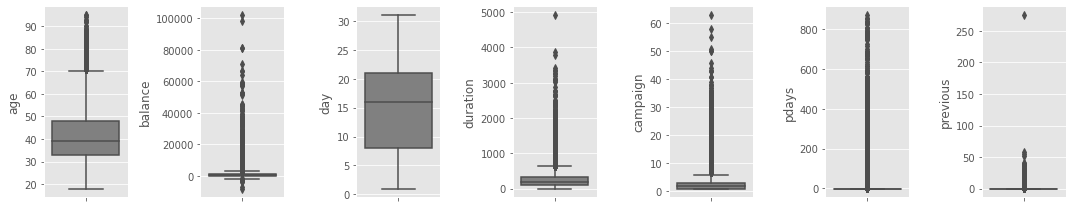

In [22]:
plt.figure(figsize = (15,3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

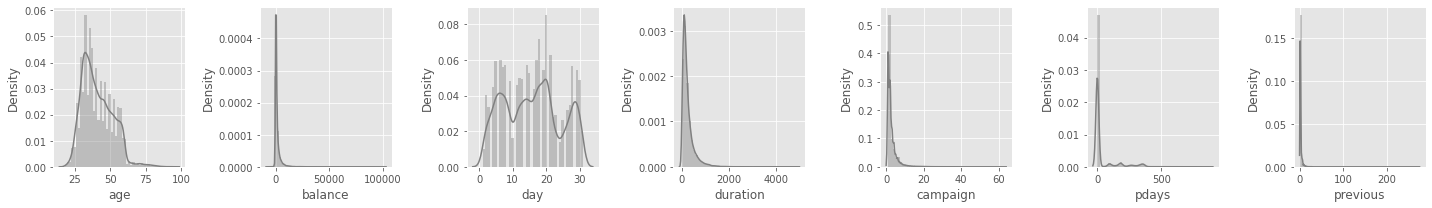

In [23]:
plt.figure(figsize = (20,3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df[nums[i]], color = 'gray')
    plt.tight_layout()

#### Kategorikal Data

In [24]:
print('1. nilai unik dari job dan jumlahnya:')
print(df['job'].value_counts())
print('')
print('2. nilai unik dari marital dan jumlahnya:')
print(df['marital'].value_counts())
print('')
print('3. nilai unik dari education dan jumlahnya:')
print(df['education'].value_counts())
print('')
print('4. nilai unik dari default dan jumlahnya:')
print(df['default'].value_counts())
print('')
print('5. nilai unik dari housing dan jumlahnya:')
print(df['housing'].value_counts())
print('')
print('6. nilai unik dari loan dan jumlahnya:')
print(df['loan'].value_counts())
print('')
print('7. nilai unik dari contact dan jumlahnya:')
print(df['contact'].value_counts())
print('')
print('8. nilai unik dari contact dan jumlahnya:')
print(df['month'].value_counts())
print('')
print('9. nilai unik dari poutcome dan jumlahnya:')
print(df['poutcome'].value_counts())
print('')
print('10. nilai unik dari y dan jumlahnya:')
print(df['y'].value_counts())
print('')

1. nilai unik dari job dan jumlahnya:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

2. nilai unik dari marital dan jumlahnya:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

3. nilai unik dari education dan jumlahnya:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

4. nilai unik dari default dan jumlahnya:
no     44396
yes      815
Name: default, dtype: int64

5. nilai unik dari housing dan jumlahnya:
yes    25130
no     20081
Name: housing, dtype: int64

6. nilai unik dari loan dan jumlahnya:
no     37967
yes     7244
Name: loan, dtype: int64

7. nilai unik dari contact dan jumlahnya:
cellular     29285
unknown      13020
telephone     2906
Name: contact

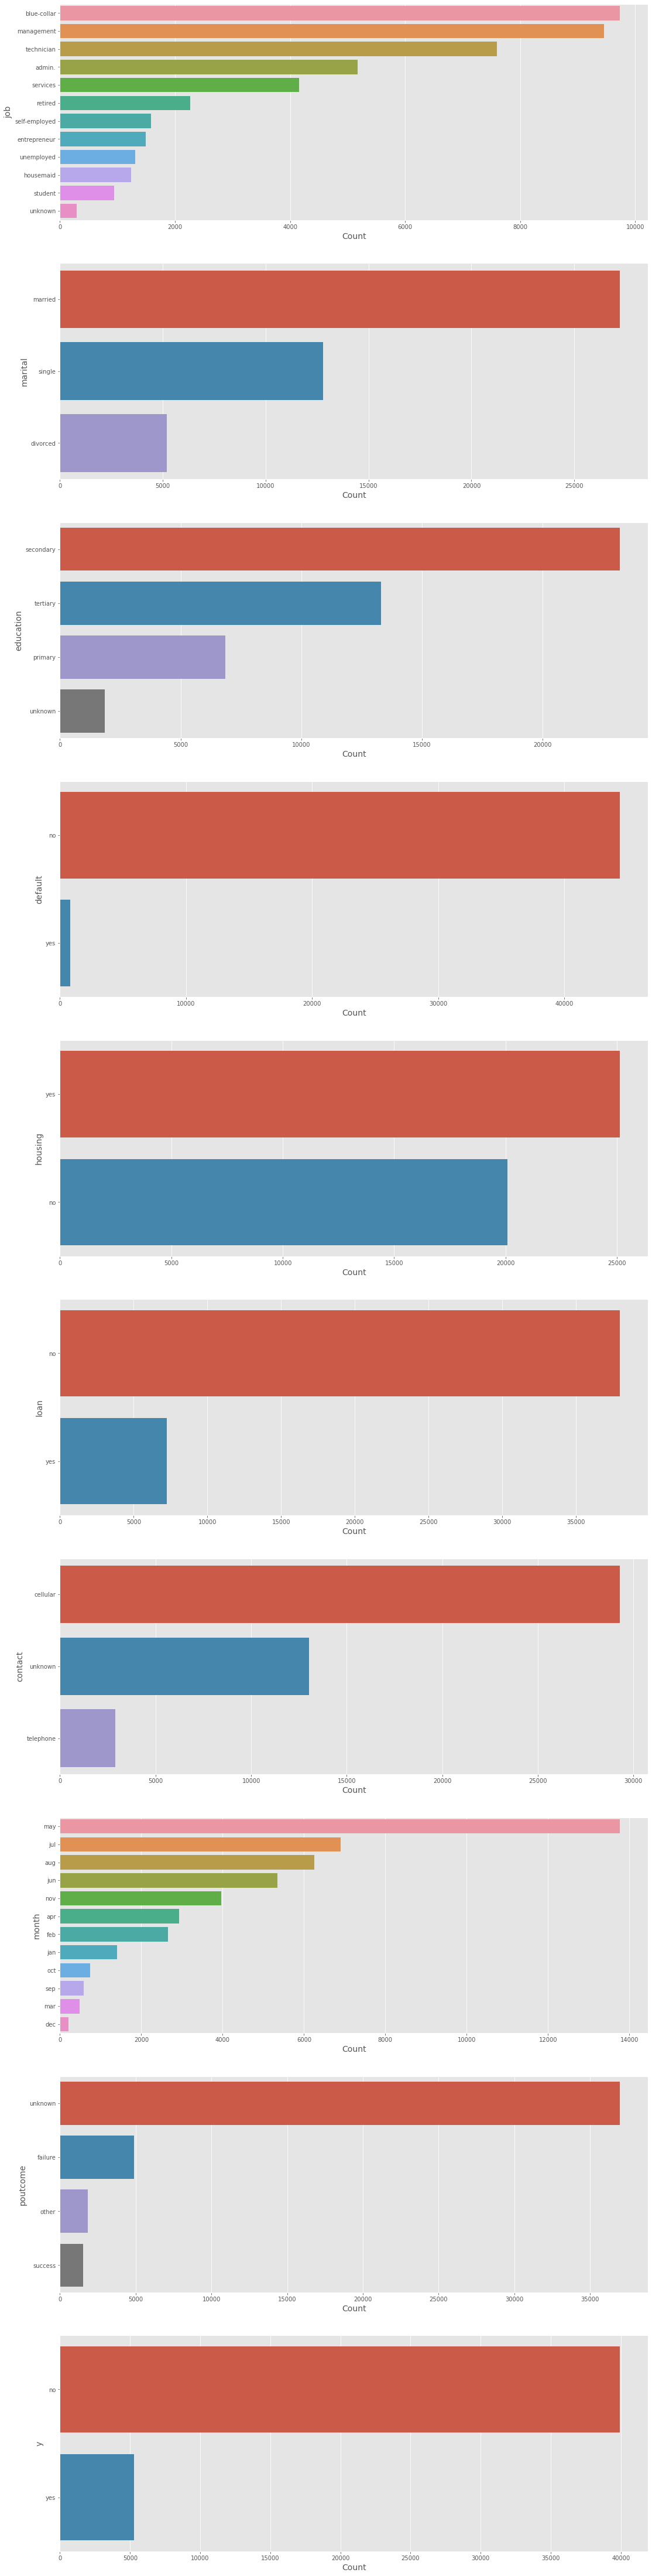

In [25]:
plt.figure(figsize=(18,80))
for idx, col in enumerate(cats):
    plt.subplot(10,1,idx + 1)
    ax = sns.countplot(data = df, y = df[col] ,order = df[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('Count', fontsize = 14)

Text(0, 0.5, 'Count')

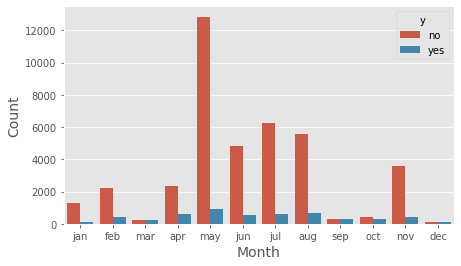

In [26]:
plt.figure(figsize=(7,4))
ax = sns.countplot(data = df, x = df['month'], hue = df['y'],
                   order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 
                            'oct', 'nov', 'dec'])
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

## Insight Univariate Analysis
Berdasarkan visualisasi dari distribusi tabel <br><br>

`Numerical` <br><br>

`Age`: <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Day` : <br>
1. normal distribution
2. tidak ditemukan low outlier dan high outlier
<br>

`Balance` : <br>
1. skew positif = mean > modus/median
2. ditemukan low outlier = ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Duration` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Campaign` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Pdays` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br>

`Previous` : <br>
1. skew positif = mean > modus/median
2. tidak ditemukan low outlier = tidak ada yang nilainya jauh dibawah normal
3. ditemukan high outlier = ada yang nilainya jauh diatas normal
<br><br>

`Categorical` <br><br>

`Job` : top 3 nya ‘blue-collar’, ‘management’, dan ‘technician’ (masing-masing memiliki nilai di atas 7000 record). terdapat ‘unknown’ job dengan jumlah record di bawah 500 <br>

`Marital` : ‘married’ menempati posisi tertinggi dengan jumlah records > 25,000, ‘single’ dan ‘divorced’ berada pada posisi kedua dan ketiga <br>

`Education` : ‘secondary’ menempati posisi tertinggi dengan > 20,000 records, diikuti dengan ‘tertiary’, ‘primary’, dan ‘unknown’. ‘unknown’ < 2,500 record <br>

`Default` : hampir semua records memiliki value ‘no’ <br>

`Housing` : posisi pertama ‘yes’ dengan jumlah record sekitar 25,000, sisanya ‘no’. distribusi keduanya cukup seimbang <br>

`Loan` : ‘no’ menempati posisi pertama (jumlah record > 35,000), sisanya ‘yes’ <br>

`Contact` : ‘cellular’ menempati posisi pertama (jumlah record > 25,000), siikuti ‘unknown’ dan ‘telephone’. jumlah ‘unknown’ cukup banyak, sekitar 13,000 record <br>

`Month` : ‘May’ menempati posisi pertama (jumlah record > 12,000), diikuti ‘jul’ dan ‘aug’ <br>

`Poutcome` : ‘unknown’ menempati posisi tertinggi dengan jumlah record > 35,000. Jumlah ‘success’ < 2,500 <br>

`y` : ‘no’ berada di posisi tertinggi, dengan jumlah record sekitar 40,000. ‘yes’ sektar 5,000 record. Kolom ini memiliki class-imbalance, kemungkinan besar akan dilakukan oversampling pada tahap selanjutnya

# 3. Multivariate Analysis

## Heatmap Correlation

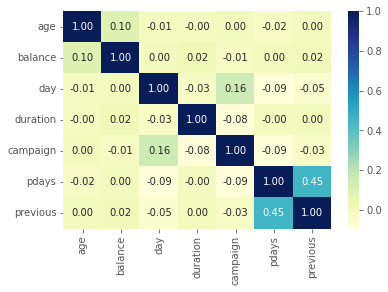

In [27]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

### Quotation for correlation
Interpretasi korelasi antar dua variabel
(Sarwono:2006)

>0 : Tidak ada korelasi antara dua variabel<br>
>0 – 0,25 : Korelasi sangat lemah<br>
>0,25 – 0,5 : Korelasi cukup<br>
>0,5 – 0,75 : Korelasi kuat<br>
>0,75 – 0,99 : Korelasi sangat kuat<br>
1 : Korelasi hubungan sempurna positif<br>
-1 : Korelasi hubungan sempurna negatif<br>

### Insight Heatmap Correlation
 * Target output yaitu `y` sebagai variabel target / variabel dependent karena variabel `y`adalah hasil prediksi dari variabel bebas lainnya dan hasilnya akan selalu berubah menyesuaikan variabel bebas
 * Tidak ada korelasi yang kuat antara target `y` dengan masing-masing feature yang ada
 * Kemungkinan besar tidak ada data yang redundant (tidak ada yang memiliki korelasi dengan nilai >0.7)

**Korelasi hasil heatmap**

Dapat disimpulkan bahwa telemarketer tidak banyak melakukan campaign terhadap client sehingga `pdays` dan`previous` memiliki korelasi cukup kuat positif sebesar 0.45

## Pairplot

In [ ]:
#Pairplot with sample 500
sns.set_style("darkgrid")
sns.pairplot(df, diag_kind='kde', hue='y')

Berdasarkan grafik diatas dapat disimpulkan bahwa :

1. Client yang memiliki umur dibawah 60 tahun lebih banyak untuk dihubungi 
selama campaign
2. Client yang memiliki rata-rata saldo tahunan dibawah 20.000 euro lebih banyak dihubungi selama campaign
3. Lama durasi telemarketer menghubungi client pada masa campaign kurang dari 1000 detik atau sekitar kurang dari 16 menit
4. Sebagian besar client yang membuka akun deposito memiliki durasi telfon relatif lebih lama dari pada yang tidak membuka akun deposito.

In [ ]:
# Atribut 'y' diubah menjadi bilangan biner dengan keterangan 1 = 'yes' dan 0 = 'no'
df1 = pd.read_csv('https://raw.githubusercontent.com/ChangCorp/finalproject/main/train_delimited_comma.csv')
df1['y'] =  df1["y"].map({'yes' : 1, 'no' : 0})
df1

## Category Plot

In [ ]:
cats_categorical=['job','marital','default','education','housing','loan','contact']

In [ ]:
plt.figure(figsize=(18,80))
for idx, col in enumerate(cats_categorical):
    plt.subplot(10,1,idx + 1)
    ax = sns.countplot(data = df, y = df[col] ,order = df[col].value_counts().index);
    plt.ylabel(col, fontsize = 14)
    plt.xlabel('y', fontsize = 14)

In [ ]:
#Penambahan kolom 'age_group'
#Rata-rata umur manusia > 70 tahun. 
#Maybe depositonya untuk anak cucu sanak saudara :D

df1.loc[df1['age']<20, 'age_group'] = '<20'
df1.loc[df1['age'].between(21,30), 'age_group'] = '20-30'
df1.loc[df1['age'].between(31,40), 'age_group'] = '30-40'
df1.loc[df1['age'].between(41,50), 'age_group'] = '40-50'
df1.loc[df1['age'].between(51,60), 'age_group'] = '50-60'
df1.loc[df1['age'].between(61,70), 'age_group'] = '60-70'
df1.loc[df1['age']>70, 'age_group'] = '>70'

df

In [ ]:
sns.countplot(data=df1,x='age_group',hue='y')

In [ ]:
#Penambahan kolom 'balance_group'

df1.loc[df1['balance']>=0, 'balance_group'] = 'positive_balance'
df1.loc[df1['balance']<=0, 'balance_group'] = 'negative_balance'


In [ ]:
sns.countplot(data=df1,x='balance_group',hue='y')

### Category vs Target

In [ ]:
# melihat hubungan fitur-fitur kategorikal dengan calon target pemodelan (y)
for i in range(0, len(cats_categorical)):
    plt.subplot(3, 3, i+1) 
    sns.kdeplot(data=df1, x='y', hue=features[i])
    #plt.xlabel(features[i])
    plt.tight_layout()

### Insight Category Plot

1. Klien dengan rentang umur 20 - 50 adalah klien yang paling banyak tertarik terhadap campaign deposito
2. Status menikah, pendidikan 'secondary', memiliki pinjaman KPR, tidak memiliki hutang di bank, penggunaan HP tertarik dengan produk deposito
3. Klien yang memiliki rata-rata saldo negatif, berarti memiliki hutang sehingga kurang tertarik dengan penawaran campaign


## Insight Multivariate Analysis
**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?**
<br>

A. Korelasi antar feature
 * Kolom `pdays` dengan `previous` memiliki korelasi cukup kuat positif (0.45)
 * Kolom `duration` dengan `y` memiliki korelasi cukup kuat positif (0.39)
 * Kolom `day` dengan `campaign` memiliki korelasi lemah positif (0.16)
 * Kolom `pdays` dengan `y` memiliki korelasi lemah positif (0.10)
 * Kolom `balance` dengan `age` memiliki korelasi lemah positif (0.10)

<br>

Feature yang paling relevan dan harus dipertahankan adalah 
 1. `Duration`
 2. `Pdays`
 3. `Previous`
 4. `Balance`
 5. `Age`
 6. `Day`
 7. `Campaign`
<br>

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**<br>

1. Terdapat korelasi yang cukup kuat positif dengan nilai paling tinggi (0.45) diantara feature yang lain, yaitu `pdays` dengan `previous` <br>
2. Klien yang paling tertarik dengan produk deposito adalah klien dengan status <br>
  a. menikah<br>
  b. pendidikan 'secondary'<br>
  c. tidak memiliki pinjaman KPR<br>
  d. tidak memiliki hutang di bank<br>
  e. menggunakan celullar/HP <br>

3. Kemungkinan besar tidak ada data yang redundant (tidak ada yang memiliki korelasi dengan nilai >0.7)

## Business Insight

1. Klien dengan rentang umur 20 - 50 adalah klien yang paling banyak tertarik terhadap campaign deposito
2. Klien yang paling tertarik dengan produk deposito adalah klien dengan status <br>
  a. menikah<br>
  b. pendidikan 'secondary'<br>
  c. tidak memiliki pinjaman KPR<br>
  d. tidak memiliki hutang di bank<br>
  e. menggunakan celullar/HP <br>
3. Klien yang memiliki rata-rata saldo negatif, berarti memiliki hutang sehingga kurang tertarik dengan penawaran campaign